# **Pre Processing**

Toolkit : https://medium.com/@muhfajarags/data-preprocessing-guide-for-beginner-bf49caa30c3b#bc05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
train_df = pd.read_csv('https://raw.github.com/muhfajarags/BCC-Preprocessing-Workshop/main/train.csv')
train_df = train_df.drop(['PassengerId'] , axis = 1)

In [3]:
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Information**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


pada dataset terdapat data kategorikal dan numerikal sehingga perlu dilakukan handling kategorikal dan numerikal

In [5]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Kolom 'Cabin' memiliki banyak nilai hilang (sekitar 70%)** sehingga kita harus menghapusnya selama penanganan nilai hilang.

**Kita dapat menggunakan imputer (simple imputer / iterative imputer)** untuk menangani nilai NaN pada kolom 'Age' dan 'Embarked'.

# Removing useless features

In [6]:
def preprocess(df):

    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

    def ticket_number(x):
        return x.split(" ")[-1]

    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])


    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)

    return df

train_df = preprocess(train_df)
train_df = train_df.drop(['Name' ,'Ticket'] , axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,0,3,male,22.0,1,0,7.2500,NaN,S,21171,A/5
1,1,1,female,38.0,1,0,71.2833,C85,C,17599,PC
2,1,3,female,26.0,0,0,7.9250,NaN,S,3101282,STON/O2.
3,1,1,female,35.0,1,0,53.1000,C123,S,113803,NONE
4,0,3,male,35.0,0,0,8.0500,NaN,S,373450,NONE


# Drop Duplicate

In [13]:
duplikat_semua_kolom = train_df.duplicated()
print(duplikat_semua_kolom.sum())

15


In [14]:
train_df= train_df.drop_duplicates()

# Missing values

In [15]:
train_df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              165
SibSp              0
Parch              0
Fare               0
Cabin            673
Embarked           2
Ticket_number      0
Ticket_item        0
dtype: int64

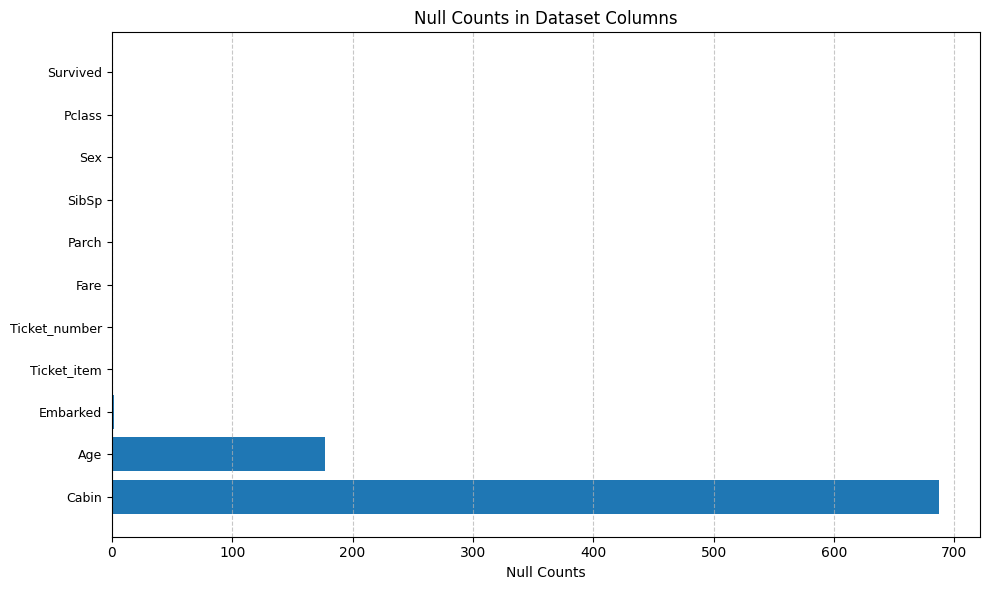

In [8]:
null_count_columns = train_df.isnull().sum()
null_counts_df = pd.DataFrame(list(null_count_columns.items()), columns=["Column", "NullCount"])
null_counts_df.sort_values(by="NullCount", inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(null_counts_df["Column"], null_counts_df["NullCount"])
plt.xlabel("Null Counts")
plt.yticks(fontsize=9)
plt.title("Null Counts in Dataset Columns")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()

In [ ]:
# Drop 'Cabin' karena memiliki 70% missing values
train_df = train_df.drop(['Cabin'] , axis = 1)

# Menggunakan simple imputers untuk null values fitur Age, Fare, dan Embarked
imp = SimpleImputer(strategy = 'mean')
train_df[['Age', 'Fare']] = imp.fit_transform(train_df[['Age', 'Fare']])
train_df[['Age', 'Fare']] = pd.DataFrame(train_df[['Age', 'Fare']] , columns = ['Age' , 'Fare'])

imp = SimpleImputer(strategy = 'most_frequent')
train_df[['Embarked']] = imp.fit_transform(train_df[['Embarked']])
train_df[['Embarked']] = pd.DataFrame(train_df[['Embarked']] , columns = ['Embarked'])

train_df.head()

In [10]:
train_df.isnull().sum().sum()

0

# Categorical data

In [ ]:
# split nominal and ordinal cat features
nominals = ['Sex' , 'Embarked' ,"Ticket_item"]
ordinals = ['Pclass' , "Parch" , "SibSp"]

# menggunakan LabelEncoding untuk nominal fitur
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
train_df['Ticket_item'] = le.fit_transform(train_df['Ticket_item'])

# Convert Ticket_number to numerik
train_df['Ticket_number'] = pd.to_numeric(train_df['Ticket_number'], errors='coerce')
train_df.head()

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int32  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    int32  
 8   Ticket_number  887 non-null    float64
 9   Ticket_item    891 non-null    int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 59.3 KB


# Outliers

In [13]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.870000e+02,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476,2.983284e+05,16.922559
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503,6.576144e+05,6.064231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.487900e+04,16.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.122770e+05,16.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,3.470820e+05,16.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.101317e+06,43.000000


In [14]:
threshold = 3
z_scores = np.abs((train_df - train_df.mean()) / train_df.std())
outliers = z_scores > threshold
outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [15]:
train_df = train_df[(z_scores <= threshold)]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item
0,0,3,1,22.0,1.0,0.0,7.2500,2,21171.0,4.0
1,1,1,0,38.0,1.0,0.0,71.2833,0,17599.0,18.0
2,1,3,0,26.0,0.0,0.0,7.9250,2,NaN,NaN
3,1,1,0,35.0,1.0,0.0,53.1000,2,113803.0,16.0
4,0,3,1,35.0,0.0,0.0,8.0500,2,373450.0,16.0


In [16]:
train_df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               7
SibSp            30
Parch            15
Fare             20
Embarked          0
Ticket_number    48
Ticket_item      39
dtype: int64

In [17]:
train_df = train_df.dropna()
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Ticket_number    0
Ticket_item      0
dtype: int64

# Splitting Features and Target

In [18]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape, "\n")

X_train shape: (763, 9)
y_train shape: (763,) 



# Data transformation

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X_train.columns)

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item
0,0.875585,0.733694,-0.640850,1.061578,-0.460194,-0.645852,0.612381,-0.888453,-3.148821
1,-1.523235,-1.362967,0.656100,1.061578,-0.460194,1.457767,-1.866382,-0.912241,0.590557
2,-1.523235,-1.362967,0.412922,1.061578,-0.460194,0.860410,0.612381,-0.271566,0.056360
3,0.875585,0.733694,0.412922,-0.568169,-0.460194,-0.619571,0.612381,1.457566,0.056360
4,0.875585,0.733694,-0.016764,-0.568169,-0.460194,-0.606157,-0.627000,1.174049,0.056360


# Feature Selection Using Correlation

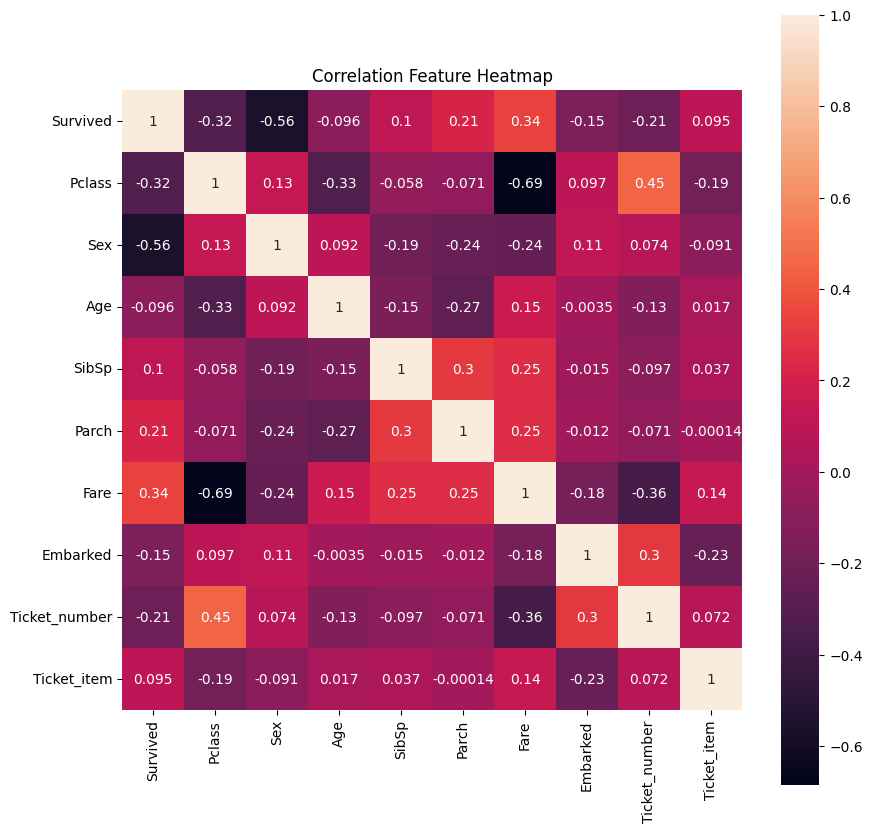

In [21]:
corrmat = train_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);
plt.title('Correlation Feature Heatmap');
plt.show()

# Feature Selection Using Embedded Method

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Imbalanced Data Using Oversampling

In [23]:
y_train.value_counts()

Survived
0    459
1    304
Name: count, dtype: int64

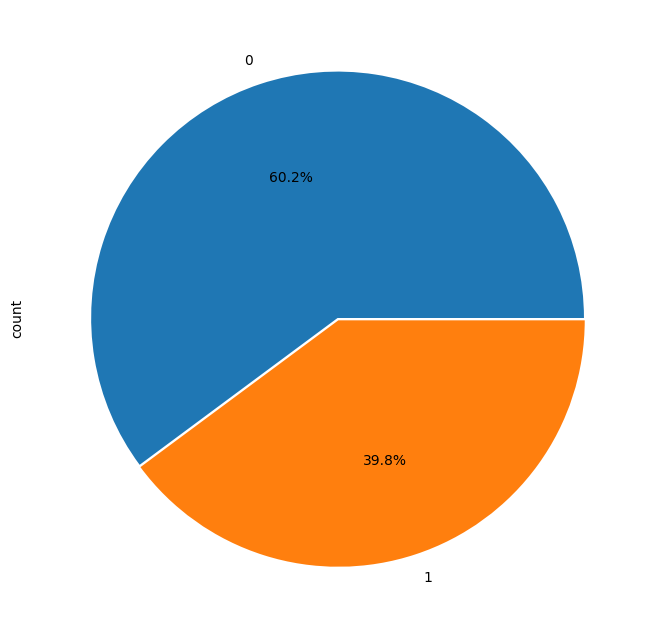

In [24]:
f,ax=plt.subplots(1,1,figsize=(12,8))
y_train.value_counts().plot.pie(explode=[0,0.01],autopct='%1.1f%%',shadow=False)
plt.show()

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
y_train.value_counts()

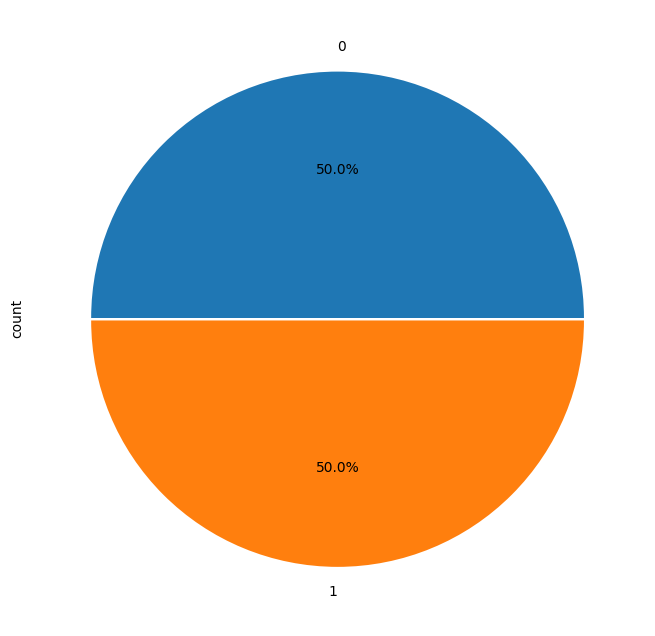

In [26]:
f,ax=plt.subplots(1,1,figsize=(12,8))
y_train.value_counts().plot.pie(explode=[0,0.01],autopct='%1.1f%%',shadow=False)
plt.show()

# Apply Preprocessing to test_df

In [27]:
def preprocessing(test_df):
  test_df = test_df.drop(['PassengerId'] , axis = 1)

  test_df = preprocess(test_df)
  test_df = test_df.drop(['Name' ,'Ticket'] , axis = 1)

  test_df = test_df.drop(['Cabin'] , axis = 1)

  test_df[['Age', 'Fare']] = imp.fit_transform(test_df[['Age', 'Fare']])
  test_df[['Age', 'Fare']] = pd.DataFrame(test_df[['Age', 'Fare']] , columns = ['Age' , 'Fare'])

  test_df[['Embarked']] = imp.fit_transform(test_df[['Embarked']])
  test_df[['Embarked']] = pd.DataFrame(test_df[['Embarked']] , columns = ['Embarked'])

  test_df['Sex'] = le.fit_transform(test_df['Sex'])
  test_df['Embarked'] = le.fit_transform(test_df['Embarked'])
  test_df['Ticket_item'] = le.fit_transform(test_df['Ticket_item'])

  test_df['Ticket_number'] = pd.to_numeric(test_df['Ticket_number'], errors='coerce')

  z_scores = np.abs((test_df - test_df.mean()) / test_df.std())

  test_df = test_df[(z_scores <= threshold)]

  test_df = test_df.dropna()

  return test_df

In [ ]:
test_df = pd.read_csv('https://raw.github.com/muhfajarags/BCC-Preprocessing-Workshop/main/test.csv')
submission = pd.read_csv('https://raw.github.com/muhfajarags/BCC-Preprocessing-Workshop/main/gender_submission.csv')
test_df = pd.concat([test_df , submission] , axis = 1)
test_df = preprocessing(test_df)

# Test and Validation set

In [29]:
test_df_X = test_df.drop('Survived' , axis =1)
test_df_y = test_df['Survived']

X_test ,X_val ,y_test ,y_val = train_test_split( test_df_X , test_df_y , test_size = 0.5 ,random_state =42)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape,"\n")

print("X_test validation:", X_val.shape)
print("y_test validation:", y_val.shape)

X_test shape: (180, 9)
y_test shape: (180,) 

X_test validation: (181, 9)
y_test validation: (181,)


# Apply Preprocessing After Split

In [ ]:
X_val = pd.DataFrame(scaler.transform(X_val) , columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test) , columns = X_test.columns)

# Save to Pickle

In [31]:
import pickle

# Menyimpan data training
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# Menyimpan data validasi
with open('X_val.pkl', 'wb') as f:
    pickle.dump(X_val, f)
with open('y_val.pkl', 'wb') as f:
    pickle.dump(y_val, f)

# Menyimpan data testing
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

# TIME TO MODELLING 🔥🔥🔥